Iteration 0, Mean Total Reward: -769.964
Iteration 1, Mean Total Reward: -723.622
Iteration 2, Mean Total Reward: -671.662
Iteration 3, Mean Total Reward: -632.528
Iteration 4, Mean Total Reward: -577.384
Iteration 5, Mean Total Reward: -522.816
Iteration 6, Mean Total Reward: -458.834
Iteration 7, Mean Total Reward: -390.122
Iteration 8, Mean Total Reward: -333.386
Iteration 9, Mean Total Reward: -272.43
Iteration 10, Mean Total Reward: -208.022
Iteration 11, Mean Total Reward: -145.618
Iteration 12, Mean Total Reward: -105.114
Iteration 13, Mean Total Reward: -75.2
Iteration 14, Mean Total Reward: -52.228
Iteration 15, Mean Total Reward: -36.536
Iteration 16, Mean Total Reward: -23.122
Iteration 17, Mean Total Reward: -11.75
Iteration 18, Mean Total Reward: -5.362
Iteration 19, Mean Total Reward: -0.664


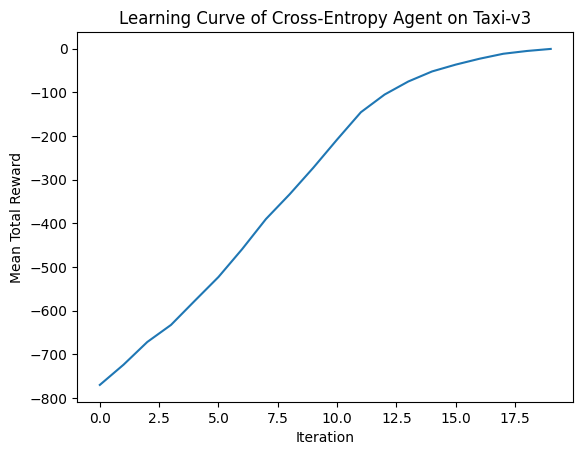

In [24]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Taxi-v3')
state_n = env.observation_space.n
action_n = env.action_space.n

class CrossEntropyAgent:
    def __init__(self, state_n, action_n):
        self.state_n = state_n
        self.action_n = action_n
        self.model = np.ones((self.state_n, self.action_n)) / self.action_n

    def get_action(self, state):
        action = np.random.choice(np.arange(self.action_n), p=self.model[state])
        return int(action)

    def fit(self, elite_trajectories):
        new_model = np.zeros((self.state_n, self.action_n))
        for trajectory in elite_trajectories:
            for state, action in zip(trajectory['states'], trajectory['actions']):
                new_model[state][action] += 1

        for state in range(self.state_n):
            if np.sum(new_model[state]) > 0:
                new_model[state] /= np.sum(new_model[state])
            else:
                new_model[state] = self.model[state].copy()

        self.model = new_model

def get_trajectory(env, agent, max_len=1000):
    trajectory = {'states': [], 'actions': [], 'rewards': []}
    state = env.reset()

    for _ in range(max_len):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        trajectory['states'].append(state)
        trajectory['actions'].append(action)
        trajectory['rewards'].append(reward)
        state = next_state
        if done:
            break

    return trajectory

agent = CrossEntropyAgent(state_n, action_n)
q_param = 0.3
iteration_n = 20
trajectory_n = 500

mean_total_rewards = []

for iteration in range(iteration_n):
    trajectories = [get_trajectory(env, agent) for _ in range(trajectory_n)]
    total_rewards = [np.sum(trajectory['rewards']) for trajectory in trajectories]

    mean_reward = np.mean(total_rewards)
    mean_total_rewards.append(mean_reward)

    print(f'Iteration {iteration}, Mean Total Reward: {mean_reward}')

    quantile = np.quantile(total_rewards, q_param)
    elite_trajectories = [trajectory for trajectory in trajectories if np.sum(trajectory['rewards']) > quantile]

    agent.fit(elite_trajectories)

plt.plot(mean_total_rewards)
plt.title('Learning Curve of Cross-Entropy Agent on Taxi-v3')
plt.xlabel('Iteration')
plt.ylabel('Mean Total Reward')
plt.show()